                                                          Ф.И.О.

# Лабораторная работа 9

## Библиотека Scipy. Потоки

**1.** Выберите 3 разные функции (например, парабола, гипербола, прямая, коэффициенты подберите самостоятельно). Изобразите их графики на одной координатной плоскости разными цветами (добавьте легенду). Пользователь вводит номер функции и интересующий его интервал, программа отдельно отображает выбранную функцию на данном интервале и находит точку минимума функции на данном интервале. Кроме того, программа выводит значение интеграла функции между двумя введенными точками.

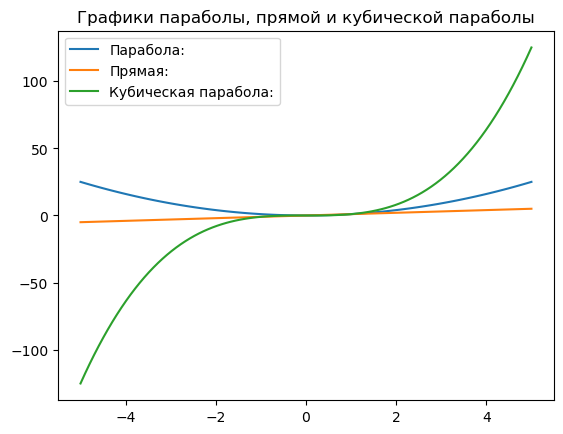


Координаты точки минимума - x: 0.0, y: 1.0
Интеграл на интервале от 0.0 до 10.0 равен 22044.19


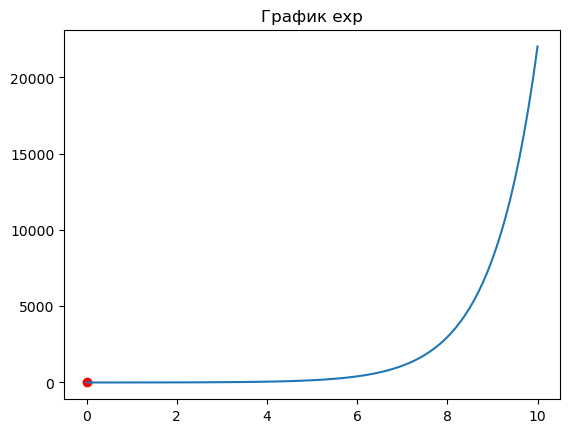

Завершение программы


In [2]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import threading
from scipy.optimize import minimize_scalar


def parabola(x):
    return x ** 2


def q_parabola(x):
    return x ** 3


def line(x):
    return x


def exponential(x):
    return np.exp(x)


def start_plot():
    x = np.linspace(-5, 5, 100)

    fig, ax = plt.subplots()

    ax.plot(x, parabola(x), label='Парабола:')
    ax.plot(x, line(x), label='Прямая:')
    ax.plot(x, q_parabola(x), label='Кубическая парабола:')

    ax.legend()
    plt.title('Графики параболы, прямой и кубической параболы')

    plt.show()


def user_plot(choise):
    plt.clf()

    x_left = float(input('Введите левую границу интервала: '))
    x_right = float(input('Введите правую границу интервала: '))

    x = np.linspace(x_left, x_right, 100)

    if choise == 1:
        graf = parabola
        graf_title = 'параболы x^2'
    elif choise == 2:
        graf = q_parabola
        graf_title = 'кубической параболы x^3'
    elif choise == 3:
        graf = line
        graf_title = 'прямой x'
    else:
        graf = exponential
        graf_title = 'exp'

    res = minimize_scalar(graf, bounds=(x_left, x_right))

    minimal_point = res.x

    minimal_value = res.fun

    integral = np.trapz(graf(x), x)

    print(f'\nКоординаты точки минимума - x: {round(minimal_point, 2)},'
          f' y: {round(minimal_value, 2)}\n'
          f'Интеграл на интервале от {x_left} до {x_right} равен {round(integral, 2)}')

    plt.plot(x, graf(x))

    plt.scatter(minimal_point, minimal_value, color='red')

    plt.title(f'График {graf_title}')

    plt.show()


def user_choise():
    while True:
        try:
            choise = int(input('Выберите, график какой функции Вы хотите увидеть:\n'
                               '1. Парабола\n'
                               '2. Кубическая парабола\n'
                               '3. Прямая\n'
                               '4. Выйти из программы\n'
                               'Ваш выбор: '))

            if choise == 1:
                user_plot(choise)

            elif choise == 2:
                user_plot(choise)

            elif choise == 3:
                user_plot(choise)
            elif choise == 5:
                user_plot(choise)
            elif choise == 4:
                print('Завершение программы\n')
                break

            else:
                print('Выбран неверный пункт меню!')

        except:
            print('\nНеверно введены данные!')


thread1 = threading.Thread(target=start_plot)
thread2 = threading.Thread(target=user_choise)
thread1.start()
thread2.start()
thread1.join()
thread2.join()

**2.** Написать программу, которая вычисляет факториал числа 100 000 и показывает, сколько времени ушло на решение этой задачи. Сначала требуется решить задачу с использованием одного потока, затем с двумя, четырьмя, восьмью. При использовании двух потоков один поток перемножает числа от 1 до 50 000, а второй – от 50 001 до 100 000, а затем результаты перемножаются (можно поэкспериментировать с разделением работы на две части, не обязательно делить интервал пополам). Сравните результаты вычисления факториала (нужно, чтобы результаты совпадали) и время вычисления при каждом способе.

In [15]:
import time
import threading
import math


def calculate_factorial(start, end):
    result = 1
    for num in range(start, end + 1):
        result *= num
    return result


def calculate_factorial_thread(start, end, result_list):
    result_list.append(calculate_factorial(start, end))


def calculate_factorial_multithread(num_threads):
    start_time = time.time()
    results = []

    ranges = []
    total_range = (1, 100000)
    step = (total_range[1] - total_range[0]) // num_threads

    for i in range(num_threads):
        start = total_range[0] + i * step
        end = start + step - 1 if i < num_threads - 1 else total_range[1]
        ranges.append((start, end))

    threads = []

    for start, end in ranges:
        thread = threading.Thread(target=calculate_factorial_thread, args=(start, end, results))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    final_result = 1
    for result in results:
        final_result *= result

    end_time = time.time()
    return final_result, end_time - start_time


result_1_thread, time_1_thread = calculate_factorial_multithread(1)
print(f'1 поток: код был выполнен за {time_1_thread} секунд')

result_2_threads, time_2_threads = calculate_factorial_multithread(2)
print(f'2 потока: код был выполнен за {time_2_threads} секунд')

result_4_threads, time_4_threads = calculate_factorial_multithread(4)
print(f'4 потока: код был выполнен за {time_4_threads} секунд')

result_8_threads, time_8_threads = calculate_factorial_multithread(8)
print(f'8 потока: код был выполнен за {time_8_threads} секунд')

result_16_threads, time_16_threads = calculate_factorial_multithread(16)
print(f'16 потоков: код был выполнен за {time_16_threads} секунд')

result_32_threads, time_32_threads = calculate_factorial_multithread(32)
print(f'32 потоков: код был выполнен за {time_32_threads} секунд')

result_64_threads, time_64_threads = calculate_factorial_multithread(64)
print(f'64 поток: код был выполнен за {time_64_threads} секунд')

math_factorial = math.factorial(100000)

print(math_factorial == result_1_thread)
print(math_factorial == result_2_threads)
print(math_factorial == result_4_threads)
print(math_factorial == result_8_threads)
print(math_factorial == result_16_threads)
print(math_factorial == result_32_threads)


1 поток: код был выполнен за 3.870000123977661 секунд
2 потока: код был выполнен за 1.9720001220703125 секунд
4 потока: код был выполнен за 1.1570003032684326 секунд
8 потока: код был выполнен за 0.794999361038208 секунд
16 потоков: код был выполнен за 0.6679999828338623 секунд
32 потоков: код был выполнен за 0.6890008449554443 секунд
64 потока: код был выполнен за 0.8190000057220459 секунд
True
True
True
True
True
True
True


**3.** Написать многопоточную программу, в которой каждый из двух потоков записывает в файл свой номер (1 или 2) 100 000 раз. Файл для обоих потоков один и тот же. Не допускается, чтобы сначала запись выполнял один поток полностью, а потом второй. Автоматически проверить, реально ли в результате в файле записано 100 000 единиц и 100 000 двоек.

In [19]:
import threading
import time


def write_numbers(filename, number, count):
    with open(filename, 'a') as f:
        for _ in range(count):
            f.write(str(number))


def main():
    filename = 'output.txt'
    open(filename, 'w').close()

    thread1 = threading.Thread(target=write_numbers, args=(filename, 1, 100000))
    thread2 = threading.Thread(target=write_numbers, args=(filename, 2, 100000))

    thread1.start()
    thread2.start()

    thread1.join()
    thread2.join()

    print("Сохранено")

    with open(filename, 'r') as f:
        content = f.read()
        ones = content.count('1')
        twos = content.count('2')

        if ones == twos == 100000:
            print("Файл содержит 100 000 единиц и двоек.")
        else:
            print(f"В файле есть {ones} единиц и {twos} двоек. Проблемки.")


if __name__ == '__main__':
    main()
# через раз получается

Сохранено
В файле есть 98304 единиц и 100000 двоек. Проблемки.


In [20]:
import threading
import time


def write_numbers(filename, number, count):
    mutex = threading.Lock()
    with open(filename, 'a') as f:
        for _ in range(count):
            mutex.acquire()
            f.write(str(number))
            mutex.release()


def main():
    filename = 'output.txt'
    open(filename, 'w').close()

    thread1 = threading.Thread(target=write_numbers, args=(filename, 1, 100000))
    thread2 = threading.Thread(target=write_numbers, args=(filename, 2, 100000))

    thread1.start()
    thread2.start()

    thread1.join()
    thread2.join()

    print("Сохранено")

    with open(filename, 'r') as f:
        content = f.read()
        ones = content.count('1')
        twos = content.count('2')

        if ones == twos == 100000:
            print("Файл содержит 100 000 единиц и двоек.")
        else:
            print(f"В файле есть {ones} единиц и {twos} двоек. Проблемки.")


if __name__ == '__main__':
    main()


Сохранено
Файл содержит 100 000 единиц и двоек.


**4.** Статистическая значимость. Изучите материалы, выданные Евгением Вячеславовичем на семинаре.

1) Сформируйте два датасета, в которые входят оценки качества двух методов:

- первый - содержит оценки качества для двух статистически неотличимых методов (то есть установите для обоих методов одинаковое среднее значение и сгенерируйте N оценок качества с заданным стандартным отклонением (отклонения можно установить разными для методов)),

- второй - то же самое, но средние методов должны отличаться.

2) Посчитайте статистическую значимость для уровней alpha = 0.05, 0.01, 0.001 для обоих датасетов по двухстороннему t-критерию Стьюдента. Выведите на графике распределения Стьюдента критические значения.

3) Посчитайте доверительные интервалы для обоих датасетов на уровне доверия 0.95.

In [31]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(10)

N = 5
mean_method_third = 0.7
mean_method_fourth = 0.74

std_dev_method_third = 0.01
std_dev_method_fourth = 0.01

data_method1 = np.random.normal(loc=mean_method_third, scale=std_dev_method_third, size=N)
data_method2 = np.random.normal(loc=mean_method_fourth, scale=std_dev_method_fourth, size=N)

df_no_eq_mean = pd.DataFrame({
    'Third Method': data_method1,
    'Fourth Method': data_method2
})
df_no_eq_mean['Difference'] = df_no_eq_mean['Third Method'] - df_no_eq_mean['Fourth Method']

print(f"\nСредние значения для отличимых методов:")
print(f"Среднее 3-го метода: {df_no_eq_mean['Third Method'].mean():.4f}")
print(f"Среднее 4-го метода: {df_no_eq_mean['Fourth Method'].mean():.4f}")
print(f"Среднее разницы: {df_no_eq_mean['Difference'].mean():.4f}")

# t-статистика и p-значение для двух выборок
t_statistic_no_eq_mean, p_value_no_eq_mean = stats.ttest_ind(df_no_eq_mean['Third Method'],
                                                             df_no_eq_mean['Fourth Method'])

print(f"Для отличимых методов:")
print(f"t-статистика: {t_statistic_no_eq_mean:.4f}, p-значение: {p_value_no_eq_mean:.4f}\n")

# уровни значимости
alpha_levels = [0.05, 0.01, 0.001]

# критические значения для разных уровней значимости
critical_values = [stats.t.ppf(alpha / 2, N - 1) for alpha in alpha_levels]

for alpha, critical_value in zip(alpha_levels, critical_values):
    print(f"Уровень значимости: {alpha}. Критическое значение: {critical_value}")

# гипотезы
print(f"\nДля отличимых методов:")
for alpha, critical_value in zip(alpha_levels, critical_values):
    if t_statistic_no_eq_mean > critical_value:
        print(
            f"На уровне значимости alpha={alpha}, t-статистика превышает критическое значение, отвергаем нулевую гипотезу.")
    else:
        print(
            f"На уровне значимости alpha={alpha}, t-статистика не превышает критическое значение, не отвергаем нулевую гипотезу.")

# уровень доверия
confidence_level = 0.95

data_method2 = df_no_eq_mean['Difference']

# рассчитываем доверительный интервал
confidence_interval_method2 = stats.t.interval(confidence_level, len(data_method2) - 1, loc=data_method2.mean(),
                                               scale=stats.sem(data_method2))

print(f"\nДоверительный интервал для второго датасета: {confidence_interval_method2}")

plt.figure(figsize=(12, 6))

df = N - 1

x = np.linspace(stats.t.ppf(0.0001, df), stats.t.ppf(0.9999, df), 3000)

# распределения Стьюдента
rv = stats.t(df)

plt.plot(x, rv.pdf(x), label='Плотность вероятности', color='blue')

alpha_levels = [0.05, 0.01, 0.001]
colors = ['red', 'green', 'purple']

for alpha, color, critical_value in zip(alpha_levels, colors, critical_values):
    plt.axvline(critical_value, color=color, linestyle='--', label=f'Критическое значение (alpha={alpha})')
    plt.axvline(-critical_value, color=color, linestyle='--')
for critical_value in critical_values:
    plt.scatter(critical_value, 0, marker='o', color='orange')
    plt.scatter(-critical_value, 0, marker='o', color='orange')

plt.xlim([x[0] * 1.5, x[-1] * 1.5])
plt.legend(loc='best', frameon=False)
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Распределение Стьюдента с критическими значениями')

plt.show()


Средние значения для неотличимых методов:
Среднее 1-го метода: 0.7506
Среднее 2-го метода: 0.7518
Среднее разницы: -0.0012

Средние значения для отличимых методов:
Среднее 3-го метода: 0.7036
Среднее 4-го метода: 0.7409
Среднее разницы: -0.0374

Для неотличимых методов:
t-статистика: -0.2999, p-значение: 0.7677
Для отличимых методов:
t-статистика: -7.4594, p-значение: 0.0000

Для неотличимых методов:
На уровне значимости alpha=0.05, t-статистика превышает критическое значение, отвергаем нулевую гипотезу.
На уровне значимости alpha=0.01, t-статистика превышает критическое значение, отвергаем нулевую гипотезу.
На уровне значимости alpha=0.001, t-статистика превышает критическое значение, отвергаем нулевую гипотезу.

Для отличимых методов:
На уровне значимости alpha=0.05, t-статистика не превышает критическое значение, не отвергаем нулевую гипотезу.
На уровне значимости alpha=0.01, t-статистика не превышает критическое значение, не отвергаем нулевую гипотезу.
На уровне значимости alpha=0.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(10)

N = 5

mean_methos = 0.75

std_dev_method_first = 0.01
std_dev_method_second = 0.01

data_method1 = np.random.normal(loc=mean_methos, scale=std_dev_method_first, size=N)
data_method2 = np.random.normal(loc=mean_methos, scale=std_dev_method_second, size=N)

df_eq_mean = pd.DataFrame({
    'First Method': data_method1,
    'Second Method': data_method2
})
df_eq_mean['Difference'] = df_eq_mean['First Method'] - df_eq_mean['Second Method']

print(f"Средние значения для неотличимых методов:")
print(f"Среднее 1-го метода: {df_eq_mean['First Method'].mean():.4f}")
print(f"Среднее 2-го метода: {df_eq_mean['Second Method'].mean():.4f}")
print(f"Среднее разницы: {df_eq_mean['Difference'].mean():.4f}")

# t-статистика и p-значение для двух выборок
t_statistic_eq_mean, p_value_eq_mean = stats.ttest_ind(df_eq_mean['First Method'], df_eq_mean['Second Method'])

print(f"\nДля неотличимых методов:")
print(f"t-статистика: {t_statistic_eq_mean:.4f}, p-значение: {p_value_eq_mean:.4f}\n")

# уровн значимости
alpha_levels = [0.05, 0.01, 0.001]
# критических значения для разных уровней значимости
critical_values = [stats.t.ppf(alpha / 2, N - 1) for alpha in alpha_levels]

for alpha, critical_value in zip(alpha_levels, critical_values):
    print(f"Уровень значимости: {alpha}. Критическое значение: {critical_value}")

# гипотезы
print(f"\nДля неотличимых методов:")
for alpha, critical_value in zip(alpha_levels, critical_values):
    if t_statistic_eq_mean > critical_value:
        print(
            f"На уровне значимости alpha={alpha}, t-статистика превышает критическое значение, отвергаем нулевую гипотезу.")
    else:
        print(
            f"На уровне значимости alpha={alpha}, t-статистика не превышает критическое значение, не отвергаем нулевую гипотезу.")

# уровень доверия
confidence_level = 0.95

data_method1 = df_eq_mean['Difference']

# рассчитываем доверительный интервал
confidence_interval_method1 = stats.t.interval(confidence_level, len(data_method1) - 1, loc=data_method1.mean(),
                                               scale=stats.sem(data_method1))
print(f"\nДоверительный интервал для первого датасета: {confidence_interval_method1}")
plt.figure(figsize=(12, 6))

# ст. свободы
df = N - 1

x = np.linspace(stats.t.ppf(0.0001, df), stats.t.ppf(0.9999, df), 10000)

# распределения Стьюдента
rv = stats.t(df)

plt.plot(x, rv.pdf(x), label='Плотность вероятности', color='blue')

alpha_levels = [0.05, 0.01, 0.001]
colors = ['red', 'green', 'purple']

for alpha, color, critical_value in zip(alpha_levels, colors, critical_values):
    plt.axvline(critical_value, color=color, linestyle='--', label=f'Критическое значение (alpha={alpha})')
    plt.axvline(-critical_value, color=color, linestyle='--')

plt.xlim([x[0] * 1.5, x[-1] * 1.5])
plt.legend(loc='best', frameon=False)
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Распределение Стьюдента с критическими значениями')

plt.show()